In [1131]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# we have an agent 
# the agent will be able to move through a matrix
#the matrix is a 10x15 space matrix
# there are locks thet the agent cannot move on to, these blocks are marked with an x
#agents can move up down left and right
# we need a history table called history with 3 columns, x position, y position and the reweard/punishment

agent= {"x":1,"y":-1}
table=[]
table.append(agent.copy())
action= ["Moved down"]
learning_rate = 0.1
gamma= 0.95
e_greedy=0.1


rewards=np.ones([10,15])
rewards=rewards*-0.01
rewards[9][12]= 1

actions=["Moved up","Moved down","Moved left","Moved right"]

q_table=[[0,0,"none",0]]

#actions for each state
for actionz in actions:
    # y values
    for i in range(1,11):
        # x values
        for j in range(1,16):
            #append all three witha  value of 0 for initialization
            q_table.append(list([j,i,actionz,0]))
q_table.pop(0)
q_table= pd.DataFrame.from_records(q_table)

In [1132]:

#functions to move
#up
# current position of an agent is (x_t,y_t)
def move_up(agent):
    agent["y"]+=1   
    #print("Moved up")
    action.append("Moved up")
    return(agent)
def move_down(agent):
    agent["y"]-=1  
   #print("Moved down")
    action.append("Moved down")
    return(agent)
def move_right(agent):
    agent["x"]+=1   
    #print("Moved right")
    action.append("Moved right")
    return(agent)
def move_left(agent):
    agent["x"]-=1   
    #print("Moved left")
    action.append("Moved left")
    return(agent)

# function for hitting a wall
def hit_wall(agent,table):
    agent= table[-1]
    print("hit wall")
    return(agent)

# create a table of rewards for each point in the maze
end_point= [13,-10]
wall_points=[[3,-2],[3,-3],[3,-4],[1,-6],[2,-6],[3,-6],[4,-6],[5,-6],[6,-6],[7,-6],[8,-6]
             ,[14,-2],[14,-3],[14,-4],[14,-5],[14,-6],[14,-7],[10,-9],[11,-9],[12,-9],[13,-9],[14,-9],[15,-9],[7,-7],[7,-8]]

# create a function to implemant the action choices
def move_bi(agent,q_table, rand,rand2,end_point=end_point,wall_points=wall_points,table=table, greedy = 0.1,gamma=0.95):
    #print(rand)
    #print(rand2)
    if rand2 >0 and rand2<=greedy:
        #rand=random.random()
        if rand >=0 and rand<=1 :
            agent=move_up(agent)
        if rand >=0.25 and rand<0.5 :
            agent=move_down(agent)
        if rand >=0.5 and rand<0.75 :
            agent=move_left(agent)
        if rand >=0.75 and rand<1 :
            agent= move_right(agent)
    else: 
    #greedy algo
        indices = [i for i, x in enumerate(q_table[(q_table[0]==agent["x"]) & (q_table[1]==-agent["y"])][3]) if x == max(q_table[(q_table[0]==agent["x"]) & (q_table[1]==-agent["y"])][3])]
        chosen_action=list(q_table[(q_table[0]==agent["x"]) & (q_table[1]==-agent["y"])][2])[random.choice(indices)]

        if chosen_action == "Moved up":
            agent=move_up(agent)
        elif chosen_action == "Moved down":
            agent=move_down(agent)
        elif chosen_action == "Moved left":
            agent=move_left(agent)
        elif chosen_action == "Moved right":
            agent=move_right(agent)

    return(agent)

In [1133]:
%matplotlib inline
epoch=0
n_iter=10000
steps=[0]
solved=0
while epoch<n_iter:
    solved=0
    step=0
    agent= {"x":1,"y":-1}
    table=[]
    table.append(agent.copy())
    action= ["Moved down"]
    #call the function to return the first value for move here - init move value
    while solved==0:
        rand1=random.random()
        rand2=random.random()
        agent=move_bi(agent,q_table, rand1, rand2,end_point,wall_points,table,greedy=e_greedy) # replece with next 2
        #make the current value for move
        #update the next move

        if [agent["x"],agent["y"]] in wall_points:
            agent=hit_wall(agent,table)

        if agent["x"]>15:
            agent=hit_wall(agent,table)

        if agent["x"]<=0:
            agent=hit_wall(agent,table)

        if agent["y"]<-10:
            agent=hit_wall(agent,table)

        if agent["y"]>=0:
            agent=hit_wall(agent,table)

        if [agent["x"],agent["y"]] == end_point:
            #agent["reward"]=1
            print("solved")
            solved=1
            #break

        #else: agent["reward"]=-0.01

        table.append(agent.copy())
        Q_s_a=q_table[(q_table[1]==-table[-1]["y"]) & (q_table[0]==table[-1]["x"]) &(q_table[2]==action[-1])][3]
        #Q_s_a=[element[3] for element in q_table if element[2]==action[-1] and element[0]==table[-1]["x"] 
        #and element[1]== -table[-1]["y"]]
        print("QSA=")
        print(Q_s_a)
        #this needs to happen after the agent has moved and while updating the Q_value
        max_q_sa_next=q_table[(q_table[1]==-agent["y"] ) & (q_table[0]==agent["x"] )][3].max()
        print("max_q_sa_next=")
        print(max_q_sa_next)
        #max_q_sa_next =max([element[3] for element in [element for element in q_table i
        #f (element[0] == agent["x"] and element[1]==-(agent["y"]))]])

        #print(q_table[(q_table[0]==1)&(q_table[1]==1)])
        # Updating Q-values
        q_table[3][(q_table[1]==-table[-2]["y"]) & (q_table[0]==table[-2]["x"]) &(q_table[2]==action[-1])]=\
        Q_s_a + learning_rate*(rewards[-table[-1]["y"]-1][table[-1]["x"]-1] +(gamma* max_q_sa_next) - Q_s_a)
        
        step+=1
        print(epoch)
        print(agent)

    epoch+=1
    
    steps.append(step)




QSA=
451    0
Name: 3, dtype: int64
max_q_sa_next=
0
0
{'x': 2, 'y': -1}
QSA=
452    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 3, 'y': -1}
hit wall
QSA=
2    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 3, 'y': -1}
QSA=
301    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 2, 'y': -1}
hit wall
QSA=
451   NaN
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 2, 'y': -1}
hit wall
QSA=
1    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 2, 'y': -1}
QSA=
300    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 1, 'y': -1}
hit wall
QSA=
0    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 1, 'y': -1}
QSA=
165    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 1, 'y': -2}
hit wall
QSA=
315    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 1, 'y': -2}
hit wall
QSA=
315   -0.001
Name: 3, dtype: float64
max_q_sa_next=
0.0
0

C:\Users\A101227\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'x': 1, 'y': -2}
QSA=
466    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 2, 'y': -2}
QSA=
1   -0.001
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 2, 'y': -1}
QSA=
166    0.0
Name: 3, dtype: float64
max_q_sa_next=
0.0
0
{'x': 2, 'y': -2}


IndexError: Cannot choose from an empty sequence

In [1139]:
[i for i, x in enumerate(q_table[(q_table[0]==agent["x"]) & (q_table[1]==-agent["y"])][3]) if x == max(q_table[(q_table[0]==agent["x"]) & (q_table[1]==-agent["y"])][3])]

[]

In [1141]:
q_table[(q_table[0]==agent["x"]) & (q_table[1]==-agent["y"])][3]

16     NaN
166    0.0
316    0.0
466    0.0
Name: 3, dtype: float64

In [873]:
agent= {"x":1,"y":-1}

In [1067]:
q_table.to_csv(r"C:\Users\A101227\Desktop\q_table.csv")


In [1092]:
[i for i, x in enumerate(q_table[(q_table[0]==agent["x"]) & (q_table[1]==-agent["y"])][3]) if x == max(q_table[(q_table[0]==agent["x"]) & (q_table[1]==-agent["y"])][3])]

[]

In [1094]:

agent=move_bi(agent,q_table, rand1, rand2,end_point,wall_points,table,greedy=0)


IndexError: Cannot choose from an empty sequence

In [1010]:
table_df=pd.DataFrame(table)

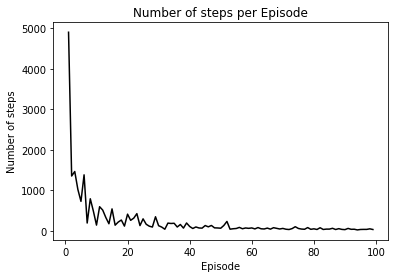

In [1002]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 10000
x = [i for i in range(1,100)]
y = steps[1:100]
colors = (0,0,0)
#area = np.pi*3

# Plot
plt.plot(x, y, c=colors, alpha=1)
plt.title('Number of steps per Episode')
plt.xlabel('Episode')
plt.ylabel('Number of steps')
plt.show()

In [970]:
 [agent["x"],agent["y"]] in end_point

False

In [1013]:
table_df["y"]

0     -1
1     -1
2     -1
3     -1
4     -1
5     -2
6     -2
7     -2
8     -3
9     -4
10    -5
11    -5
12    -4
13    -4
14    -5
15    -6
16    -7
17    -6
18    -6
19   -10
20    -7
21    -8
22    -9
23   -10
24   -10
25   -10
26   -10
27   -10
Name: y, dtype: int64

Text(0.5, 1.0, 'Walkplot (Sequence)')

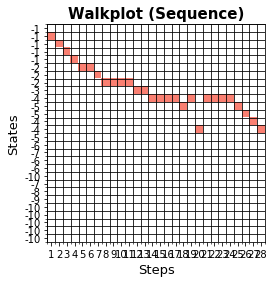

In [1018]:
import numpy as np
import matplotlib.colors as mlc
import matplotlib.pyplot as mlp

states = table_df["y"]
walk = table_df["x"]

states_len = len(states)
walk_len = len(walk)

img = np.zeros((states_len, walk_len), dtype=float)

for i, s in enumerate(walk):
    img[s, i] = 1.0

figure, ax = mlp.subplots()

color_map = mlc.LinearSegmentedColormap.from_list('ColorMap', [(1.000, 1.000, 1.000), (0.984, 0.501, 0.447)])
ax.imshow(img, cmap=color_map, interpolation='none')

ax.set_xlabel('Steps', fontsize=13)
ax.set_xticks(np.arange(0, walk_len, 1))
ax.set_xticks(np.arange(-0.5, walk_len, 1), minor=True)
ax.set_xticklabels(np.arange(1, walk_len + 1, 1))

ax.set_ylabel('States', fontsize=13)
ax.set_yticks(np.arange(0, states_len, 1))
ax.set_yticks(np.arange(-.5, states_len, 1), minor=True)
ax.set_yticklabels(states)

ax.grid(which='minor', color='k')

ax.set_title('Walkplot (Sequence)', fontsize=15, fontweight='bold')

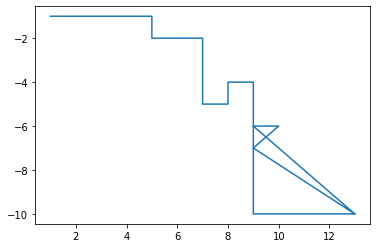

In [1016]:
plt.plot(  table_df["x"],table_df["y"])

In [1019]:
table_df

,x,y
0,1,-1
1,2,-1
2,3,-1
3,4,-1
4,5,-1
5,5,-2
6,6,-2
7,7,-2
8,7,-3
9,7,-4


In [1095]:
%matplotlib inline
epoch=0
n_iter=1
#steps=[0]
solved=0
while epoch<n_iter:
    solved=0
    #step=0
    agent= {"x":1,"y":-1}
    table=[]
    table.append(agent.copy())
    action= ["Moved down"]
    while solved==0:
        rand1=random.random()
        rand2=random.random()
        agent=move_bi(agent,q_table, rand1, rand2,end_point,wall_points,table,greedy=0)

        if [agent["x"],agent["y"]] in wall_points:
            agent=hit_wall(agent,table)

        if agent["x"]>15:
            agent=hit_wall(agent,table)

        if agent["x"]<=0:
            agent=hit_wall(agent,table)

        if agent["y"]<-10:
            agent=hit_wall(agent,table)

        if agent["y"]>=0:
            agent=hit_wall(agent,table)

        if [agent["x"],agent["y"]] == end_point:
            #agent["reward"]=1
            print("solved")
            solved=1
            #break

        #else: agent["reward"]=-0.01

        table.append(agent.copy())
        Q_s_a=q_table[(q_table[1]==-table[-2]["y"]) & (q_table[0]==table[-2]["x"]) &(q_table[2]==action[-1])][3]
        #Q_s_a=[element[3] for element in q_table if element[2]==action[-1] and element[0]==table[-1]["x"] 
        #and element[1]== -table[-1]["y"]]
        #this needs to happen after the agent has moved and while updating the Q_value
        max_q_sa_next=q_table[(q_table[1]==-agent["y"] ) & (q_table[0]==agent["x"] )][3].max()
        #max_q_sa_next =max([element[3] for element in [element for element in q_table i
        #f (element[0] == agent["x"] and element[1]==-(agent["y"]))]])

        #print(q_table[(q_table[0]==1)&(q_table[1]==1)])
        # Updating Q-values
        q_table[3][(q_table[1]==-table[-2]["y"]) & (q_table[0]==table[-2]["x"]) &(q_table[2]==action[-1])]=\
        Q_s_a + learning_rate*(rewards[-table[-1]["y"]-1][table[-1]["x"]-1] +(gamma* max_q_sa_next) - Q_s_a)
        
        step+=1
        print(epoch)
        print(agent)

    epoch+=1
    
    #steps.append(step)




IndexError: Cannot choose from an empty sequence

Text(0, 0.5, 'y-axis')

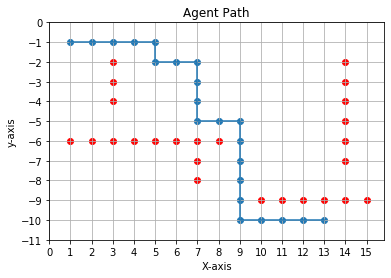

In [1064]:
import matplotlib
matplotlib.pyplot.grid(b=True, which='major', axis='both')
matplotlib.pyplot.grid(b=True, which='minor', axis='both')
plt.scatter(pd.DataFrame(table)["x"],pd.DataFrame(table)["y"])
plt.plot(pd.DataFrame(table)["x"],pd.DataFrame(table)["y"])
plt.scatter(pd.DataFrame(wall_points)[0],pd.DataFrame(wall_points)[1],color='red')
plt.yticks([i for i in range(-11,1)])
plt.xticks([i for i in range(0,16)])

plt.title('Agent Path')
plt.xlabel('X-axis')
plt.ylabel('y-axis')

In [1075]:
table_df

,x,y
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,5,2
6,6,2
7,7,2
8,7,3
9,7,4


In [1074]:
table_df=pd.DataFrame(table)
table_df["y"]=table_df["y"]*-1
table_df.to_csv(r"C:\Users\A101227\Desktop\sequence.csv")